# Regresión lineal simple

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_linea=pd.read_csv('file1.csv',sep=';')

In [35]:
df_linea.head()

,x,y
0,0.60,0.01
1,0.65,0.04
2,0.69,0.06
3,0.73,0.08
4,0.77,0.10


In [7]:
df_linea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       53 non-null     float64
 1   y       53 non-null     float64
dtypes: float64(2)
memory usage: 980.0 bytes


In [56]:
X = df_linea.iloc[:,0]
Y = df_linea.iloc[:,0]

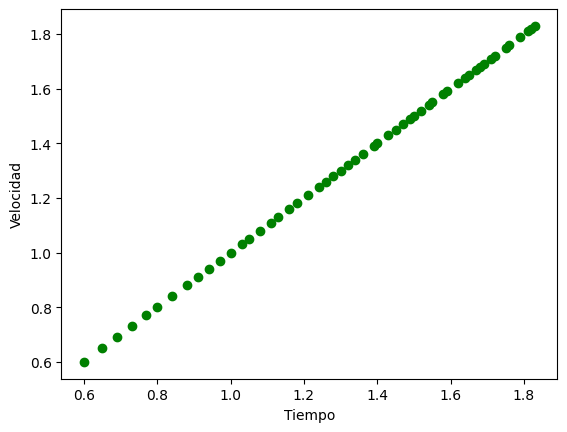

In [57]:
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.scatter(X, Y, c='green')
plt.show()

In [81]:
def crear_linea(b0, b1):
    '''Crea una linea a partir de la pendiente y la intersección'''
    x_l = np.linspace(X[0],X[-1],2)
    y_l = [b0 + b1*x for x in x_l]

    return x_l, y_l

In [25]:
b0 = -0.48*0.6  # interseccion
b1 =  0.48  # pendiente

x_l, y_l = crear_linea(b0, b1)


plt.figure(figsize=(10,6))
plt.title('Diagrama de dispersion')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.scatter(X,Y)
plt.plot(x_l, y_l, c='red')
plt.show()

NameError: name 'crear_linea' is not defined

## Regresión lineal con statsmodels

In [58]:
import statsmodels.api as sm

In [102]:
x = sm.add_constant(X)
lm = sm.OLS(Y, x)
resultado = lm.fit()

In [103]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.180e+05
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.77e-87
Time:                        10:49:41   Log-Likelihood:                 220.74
No. Observations:                  53   AIC:                            -437.5
Df Residuals:                      51   BIC:                            -433.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3005      0.002   -145.246      0.0

In [113]:
resultado.const()

AttributeError: 'OLSResults' object has no attribute 'const'

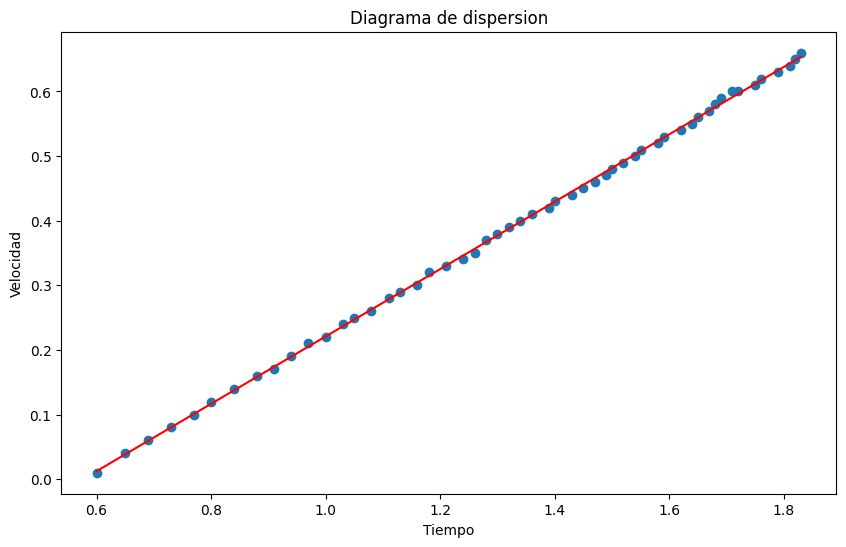

In [104]:
b0 = -0.3005  # interseccion
b1 =  0.5214  # pendiente

x_l, y_l = crear_linea(b0, b1)


plt.figure(figsize=(10,6))
plt.title('Diagrama de dispersion')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.scatter(X,Y)
plt.plot(x_l, y_l, c='red')
plt.show()

Text(0, 0.5, 'Velocidad')

<Figure size 640x480 with 0 Axes>

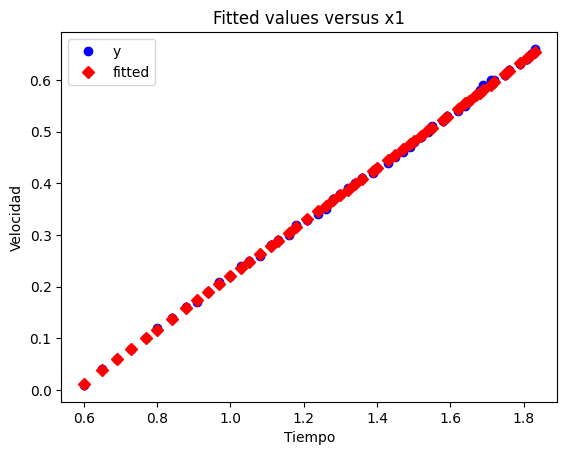

In [110]:
fig = plt.figure()
fig = sm.graphics.plot_fit(resultado,1,vlines=False)
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')


## Entrenamiento de un modelo lineal

In [9]:
datos_entrenamiento = df_linea.sample(frac=0.8,random_state=0)
datos_test = df_linea.drop(datos_entrenamiento.index)

In [11]:
etiquetas_entrenamiento = datos_entrenamiento.pop('y')
etiquetas_test = datos_test.pop('y')

In [72]:
#datos_entrenamiento.head()
etiquetas_entrenamiento .head()

43    0.58
32    0.47
38    0.53
33    0.48
11    0.22
Name: y, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [21]:
predicciones = modelo.predict(datos_test)
predicciones

array([0.01280175, 0.08052009, 0.18991124, 0.33055701, 0.35660253,
       0.37743894, 0.5076665 , 0.54413022, 0.58059394, 0.61184856,
       0.63268497])

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 0.404739


In [33]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(etiquetas_test, predicciones))

Coefficient of determination: 1.00


In [23]:
modelo.intercept_

np.float64(-0.29974440287063714)

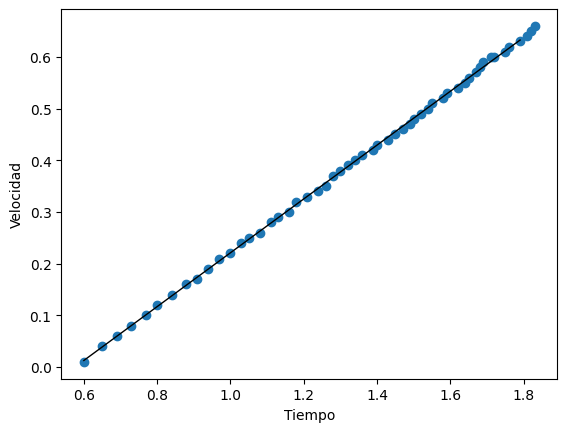

In [30]:
plt.scatter(X,Y)
plt.plot(datos_test, predicciones, color="black", linewidth=1)


plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.show()

## otra forma de separar las variables de entrenamiento y prueba

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=0)

In [73]:
Y_test

43    1.68
32    1.49
38    1.59
33    1.50
11    1.00
2     0.69
31    1.47
41    1.65
29    1.43
26    1.36
4     0.77
10    0.97
27    1.39
52    1.83
30    1.45
37    1.58
Name: x, dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X,Y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.